In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import learning_curve, validation_curve

In [2]:
def load_tic_toe_data(data_path='./data/tic-tac-toe/tic-tac-toe.data'):
    return pd.read_csv(data_path)

Experiment with decsion trees

In [3]:
tic_tac_toe_data = load_tic_toe_data()

In [140]:
for col_name in tic_tac_toe_data.columns:
#     print(tic_tac_toe_data[col_name].dtype)
    if(tic_tac_toe_data[col_name].dtype == 'object'):
        tic_tac_toe_data[col_name]= tic_tac_toe_data[col_name].astype('category')
        tic_tac_toe_data[col_name] = tic_tac_toe_data[col_name].cat.codes
tic_tac_toe_data.describe()
# tic_tac_toe_data.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,1.221526,1.132706,1.221526,1.132706,1.311390,1.133751,1.221526,1.133751,1.222571,0.653083
std,0.775566,0.798892,0.775566,0.798892,0.741201,0.799372,0.775566,0.799372,0.775941,0.476238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [35]:
# print(tic_tac_toe_data.iloc[:, np.r_[0:9]].head())
# print(tic_tac_toe_data.iloc[:, np.r_[9:10]].tail())
X = tic_tac_toe_data.iloc[:, np.r_[0:9]]
y = tic_tac_toe_data.iloc[:, np.r_[9:10]]

In [163]:
# tic_train_set, tic_test_set = train_test_split(tic_tac_toe_data, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [185]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=12, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=42)

In [197]:
cross_val_score(tree_clf, X_train, y_train, cv=20)

array([0.78787879, 0.9375    , 0.8125    , 0.84375   , 0.84375   ,
       0.875     , 0.78125   , 0.90625   , 0.84375   , 0.8125    ,
       0.90625   , 0.875     , 0.84375   , 0.875     , 0.875     ,
       0.875     , 0.90625   , 1.        , 0.875     , 0.78125   ])

In [201]:
train_accuracy = accuracy_score(y_train, tree_clf.predict(X_train))
test_accuracy = accuracy_score(y_test, tree_clf.predict(X_test))
# train_precision = precision_score(y_train, tree_clf.predict(X_train))
# test_precision = precision_score(y_test, tree_clf.predict(X_test))
print(train_accuracy)
print(test_accuracy)
tree_clf.get_depth()
# print(train_precision, test_precision)

1.0
0.8417721518987342


12

In [199]:
train_sizes, train_scores, test_scores = learning_curve(tree_clf, X_train, y_train, cv=20, random_state=42)


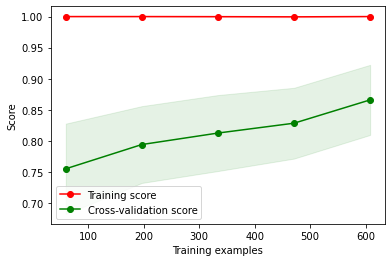

In [204]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

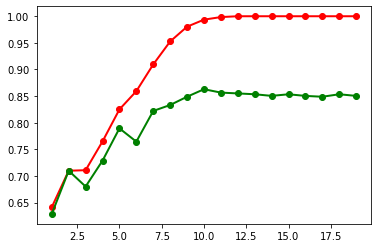

In [217]:
lw = 2
max_depth_range = range(1,20)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X_train, y_train, param_name="max_depth", param_range=max_depth_range, scoring="accuracy", cv=20)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(max_depth_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(max_depth_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

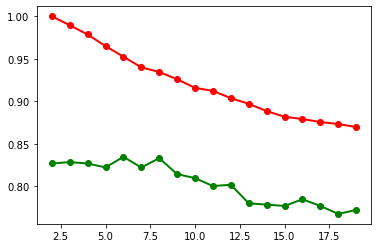

In [216]:
lw = 2
min_samples_split_range = range(2,20)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X_train, y_train, param_name="min_samples_split", param_range=min_samples_split_range, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(min_samples_split_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(min_samples_split_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)